# Wine Classification Using Unsupervised Learning

This notebook sets out to use unsupervised to determine the class of wine grown based on its attributes.

The [dataset](https://archive.ics.uci.edu/dataset/109/wine), obtained from UC Irvine's Machine Learning Repository, contains the result of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 

The features captured in the dataset are:
1) Alcohol
2) Malic acid
3) Ash
4) Alcalinity of ash  
5) Magnesium
6) Total phenols
7) Flavanoids
8) Nonflavanoid phenols
9) Proanthocyanins
10) Color intensity
11) Hue
12) OD280/OD315 of diluted wines
13) Proline 

## Preamble

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import random

## Part 1: Explore Data

In [3]:
# fetch dataset
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 
df = X.join(y)

print(X.shape)
print(y.shape)

(178, 13)
(178, 1)


In [34]:
# check for null values
df.isnull().sum()

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
class                           0
dtype: int64

In [36]:
df.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
 13  class

In [39]:
# check for duplicates
df.duplicated().sum()

np.int64(0)

class
2        71
1        59
3        48
Name: count, dtype: int64


<Axes: xlabel='class'>

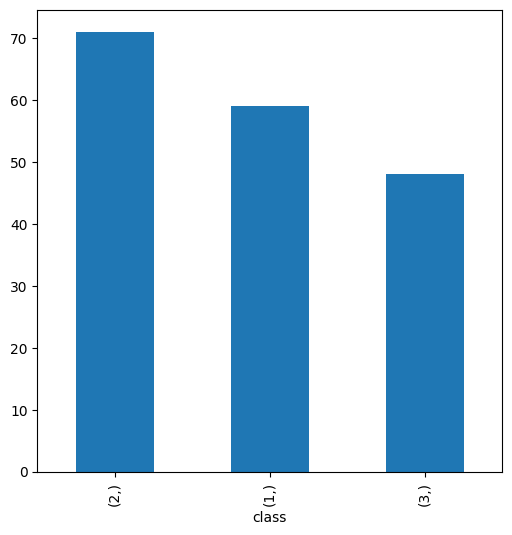

In [10]:
print(y.value_counts())
plt.figure(figsize=(6, 6))
y.value_counts().plot(kind='bar')

Taking a quick look at the dataset, we note that:
- there are 178 rows in the dataset with 13 unique features
- feature data types are numbers
- there are no missing values
- the target variable ranges from 1 to 3
- target variable breakdown out of 178 rows:
    - Class 1: 59 (33.1%)
    - Class 2: 71 (39.9%)
    - Class 3: 48 (27.0%)

<Axes: >

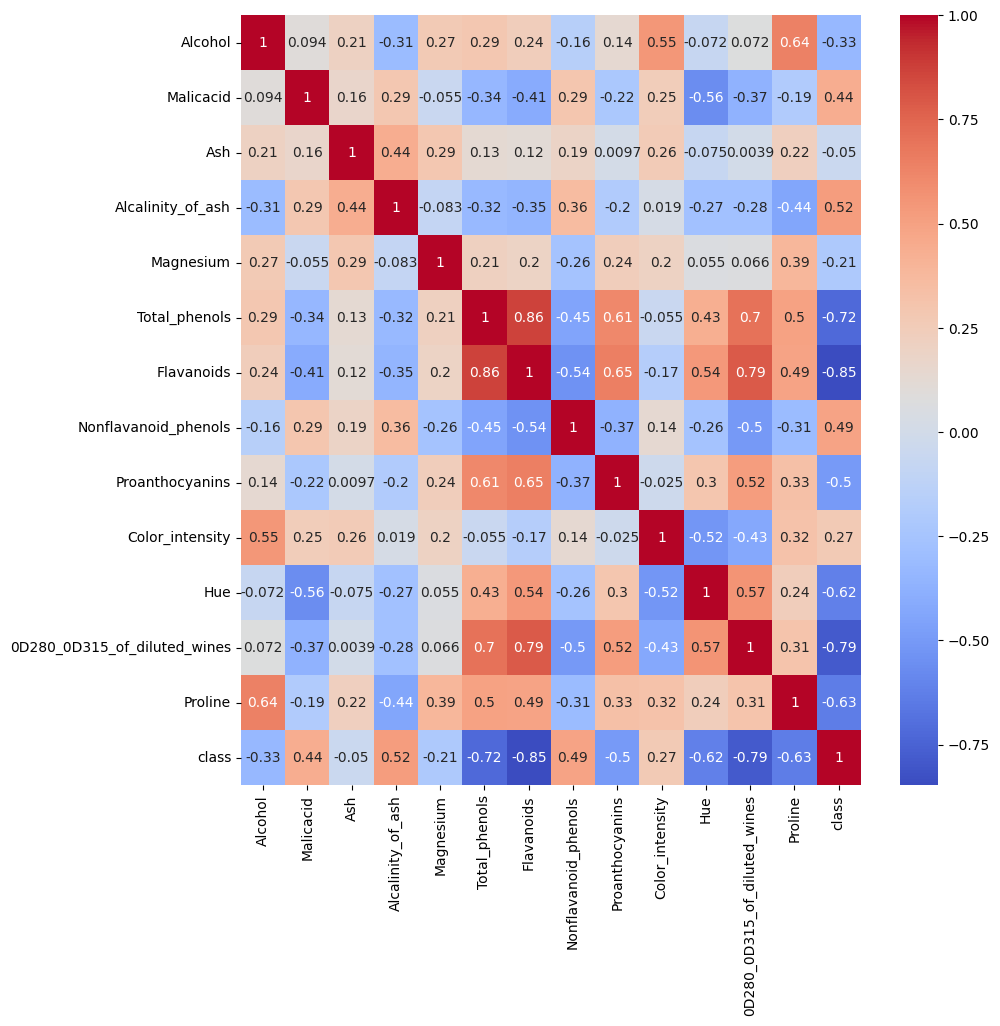

In [11]:
# visualize correlations
plt.figure(figsize=(10, 10))

sns.heatmap(df.corr(),
            cmap="coolwarm",
            annot=True,)

In [33]:
corr_class = df.corr()['class']
corr_class[corr_class.abs() > 0.5]

Alcalinity_of_ash               0.517859
Total_phenols                  -0.719163
Flavanoids                     -0.847498
Hue                            -0.617369
0D280_0D315_of_diluted_wines   -0.788230
Proline                        -0.633717
class                           1.000000
Name: class, dtype: float64

The variables with correlations greater than 0.5, in absolute terms, are:
- `Alcalinity_of_ash `
- `Total_phenols`
- `Flavanoids`
- `Hue`
- `0D280_0D315_of_diluted_wines`
- `Proline`

## Part 2: Data Preprocessing

In [32]:
#We will use scalling of our data.
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Part 3: K-Means Clustering

In [ ]:
fixed_random_state = random.seed(42)
std_figure_size = (8,5)

inertias_1 = []
range_clusters_1 = np.arange(2, 10, dtype=int)

for n in range_clusters_1:
    kmeans_1 = KMeans(n_clusters=n, random_state=fixed_random_state).fit(X)
    inertias_1.append(kmeans_1.inertia_)

fig, axs = plt.subplots(figsize=std_figure_size)
sns.lineplot(x=range_clusters_1, y=inertias_1)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
# plt.ylim(bottom=0)
plt.show()

In [ ]:
# Elbow method
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++',
                    max_iter = 300,
                    n_init = 10,
                    random_state = 0)
    kmeans.fit(df)
    cs.append(kmeans.inertia_)

plt.figure(figsize=(6, 4), dpi=80)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [ ]:
kmeans_3 = KMeans(n_clusters=3, init='k-means++',random_state=42)
y = kmeans_3.fit_predict(X)
print(y)

In [ ]:
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')

centers = kmeans_3.cluster_centers_

plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=200,
            alpha=0.5)

In [ ]:
kmeans_2 = KMeans(n_clusters=2, init='k-means++',random_state=42)
y = kmeans_2.fit_predict(X)
print(y)

In [ ]:
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')

centers = kmeans_2.cluster_centers_

plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=200,
            alpha=0.5)

In [ ]:
kmeans_4 = KMeans(n_clusters=4, init='k-means++',random_state=42)
y = kmeans_4.fit_predict(X)
print(y)

In [ ]:
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')

centers = kmeans_4.cluster_centers_

plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=200,
            alpha=0.5)